In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [36]:
df = pd.read_csv('../lung_cancer_examples.csv')

# Display the first few rows of the dataset
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [37]:
# Preprocess Data
# Select columns for features and target
X = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
# Create and Train Gradient Boosting Machine Model
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [40]:
# Make Predictions and Evaluate
y_pred = gbm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92         7

    accuracy                           0.94        18
   macro avg       0.96      0.93      0.94        18
weighted avg       0.95      0.94      0.94        18



In [41]:
# Test with a Specific Sample
sample = np.array([[30, 0, 5, 2]])  # Replace with your actual sample
prediction = gbm.predict(sample)

print('Prediction for sample [30, 0, 5, 2]:', prediction[0])

Prediction for sample [30, 0, 5, 2]: 0


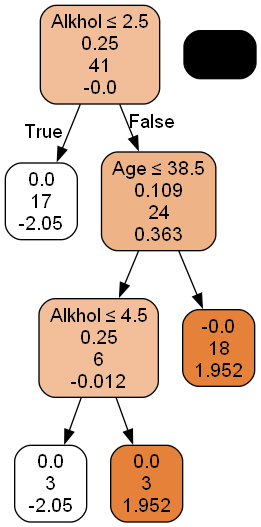

In [42]:
# Extract one tree from the forest (e.g., the first tree)
tree = gbm.estimators_[0, 0]  # For GBM, access the tree at [0, 0] index

# Export the tree as DOT data with simplified visualization parameters
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=df.columns[2:-1],
                           class_names=[str(i) for i in set(y)],
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3,  # Limit the depth for better readability
                           node_ids=False,  # Do not show node IDs
                           label='none',  # Do not show labels
                           leaves_parallel=False)  # Avoid parallel leaves

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the simplified tree image
Image(graph.create_png(), width=800, height=600)